# Image classification using logistic regression

In [1]:
import torch
import torchvision
from  torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root='.',download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root='.',train=False)

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5076FEE810>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label 5


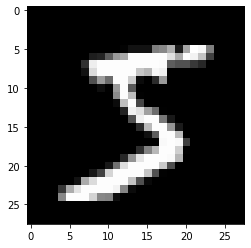

In [7]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('Label',label)

Label 5


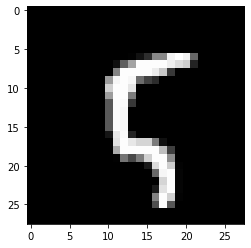

In [8]:
image,label=dataset[100]
plt.imshow(image,cmap='gray')
print('Label',label)

Label 3


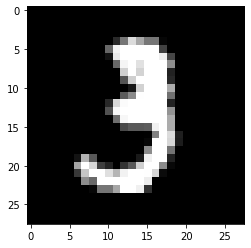

In [9]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print('Label',label)

In [10]:
import torchvision.transforms as  transforms

In [11]:
dataset=MNIST(root='.',train=True,transform=transforms.ToTensor())

In [12]:
img_tensor, label =dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(torch.max(img_tensor),torch.min(img_tensor))

tensor(1.) tensor(0.)


In [14]:
import numpy as np

def split_indices(n,val_pct):
  #length of val set
  n_val=int(n*val_pct)
  #random permutation 
  idxs=np.random.permutation(n)

  return idxs[n_val:],idxs[:n_val]


In [15]:
train_indices,val_indices=split_indices(len(dataset),val_pct=0.2)

In [16]:
print('train_indices:',train_indices)
print('val_indices:',val_indices)

train_indices: [33717  9373 17081 ... 13979 11900  7092]
val_indices: [18866 44364 13455 ... 49916 24820 45864]


In [17]:
print('train_indices:',len(train_indices))
print('val_indices:',len(val_indices))

train_indices: 48000
val_indices: 12000


In [18]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader  

In [19]:
batch_size=100
# train dataloader with sampling 
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,batch_size,sampler=train_sampler)


#valid dataloader with sampling


val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)

# Model 

In [20]:
import torch.nn as nn

In [21]:
input_size=28*28
num_classes=10
model=nn.Linear(input_size,num_classes)

In [22]:
print(model.weight.shape)

torch.Size([10, 784])


In [23]:
print(model.bias.shape)

torch.Size([10])


In [24]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)
  
  def forward(self,xb):
    xb=xb.reshape(-1,784)
    output=self.linear(xb)

    return output
model=MnistModel()

In [25]:
for images,labels in train_loader:
  outputs=model(images)
  break
outputs

tensor([[-0.0715,  0.0685, -0.0954, -0.0741,  0.0562, -0.2334,  0.2845, -0.0516,
          0.2869,  0.0507],
        [-0.1047,  0.0309, -0.0113, -0.0349,  0.2112,  0.0784, -0.3169, -0.0243,
          0.2160,  0.0014],
        [-0.0765, -0.0999,  0.0505, -0.4322,  0.1467, -0.3087,  0.0395, -0.5526,
          0.1754, -0.0100],
        [-0.1008, -0.1083, -0.1947, -0.2716,  0.2613, -0.1120,  0.2488, -0.0595,
          0.1054, -0.0411],
        [ 0.0561, -0.1874, -0.2118, -0.1629,  0.2594, -0.2845,  0.3429, -0.3168,
         -0.0528, -0.4784],
        [-0.2841, -0.1773,  0.0843, -0.2374,  0.1923, -0.0472,  0.3522, -0.1330,
          0.2145, -0.3808],
        [-0.2006, -0.3438,  0.0118, -0.2367,  0.0714, -0.3823,  0.3354, -0.3101,
          0.2148, -0.1309],
        [-0.0265, -0.1102,  0.0278, -0.1159,  0.2269, -0.2013,  0.2376, -0.2067,
          0.3468, -0.3412],
        [ 0.0290, -0.2259, -0.2788, -0.0426,  0.1049, -0.1867,  0.2632, -0.4035,
          0.2650, -0.3998],
        [-0.1242,  

In [26]:
import torch.nn.functional as F

In [27]:
probs=F.softmax(outputs,dim=1)
probs[0]

tensor([0.0899, 0.1035, 0.0878, 0.0897, 0.1022, 0.0765, 0.1284, 0.0917, 0.1287,
        0.1016], grad_fn=<SelectBackward>)

In [48]:
max_probs,preds=torch.max(outputs,dim=1)
max_probs,preds

(tensor([0.2869, 0.2160, 0.1754, 0.2613, 0.3429, 0.3522, 0.3354, 0.3468, 0.2650,
         0.1540, 0.2219, 0.3108, 0.1450, 0.2388, 0.1891, 0.2821, 0.1508, 0.4255,
         0.5648, 0.2279, 0.3175, 0.2542, 0.2492, 0.1765, 0.1998, 0.4415, 0.1972,
         0.4284, 0.4579, 0.3692, 0.4307, 0.2247, 0.1343, 0.4414, 0.2067, 0.5238,
         0.3385, 0.3239, 0.2051, 0.3823, 0.3802, 0.2464, 0.2452, 0.3483, 0.2756,
         0.0801, 0.1863, 0.3115, 0.2626, 0.1788, 0.5465, 0.1276, 0.3594, 0.1674,
         0.3170, 0.1772, 0.1627, 0.2662, 0.2402, 0.3411, 0.1476, 0.2811, 0.2223,
         0.2348, 0.3460, 0.1808, 0.1964, 0.2372, 0.2846, 0.1609, 0.1479, 0.3052,
         0.3750, 0.4697, 0.2215, 0.1930, 0.4340, 0.1726, 0.3653, 0.3898, 0.3408,
         0.2206, 0.2760, 0.2273, 0.3611, 0.3588, 0.4779, 0.2425, 0.0766, 0.4017,
         0.2102, 0.3561, 0.2456, 0.2343, 0.2502, 0.2062, 0.3963, 0.3870, 0.1074,
         0.1422], grad_fn=<MaxBackward0>),
 tensor([8, 8, 8, 4, 6, 6, 6, 8, 8, 8, 8, 4, 4, 8, 6, 8, 6, 8, 4, 

In [29]:
labels

tensor([6, 2, 0, 1, 4, 8, 8, 8, 9, 1, 6, 3, 1, 6, 3, 7, 8, 6, 0, 2, 6, 9, 1, 1,
        0, 6, 6, 1, 2, 6, 0, 0, 0, 2, 5, 5, 6, 3, 5, 2, 0, 1, 3, 3, 6, 7, 1, 6,
        3, 1, 5, 1, 0, 4, 9, 9, 5, 2, 3, 8, 7, 2, 3, 1, 4, 1, 4, 9, 3, 1, 4, 5,
        4, 0, 2, 6, 6, 8, 8, 3, 6, 3, 9, 8, 0, 8, 8, 2, 7, 9, 2, 2, 6, 7, 0, 1,
        0, 2, 9, 7])

In [30]:
torch.sum(preds == labels)


tensor(9)

In [31]:
torch.sum(preds == labels).item() /len(labels) *100


9.0

# Evalutaion metrics 

In [32]:
def accuracy (outputs,labels):
  

  _,preds=torch.max(outputs,dim=1)

  return torch.sum(preds==labels).item()/len(labels)

In [33]:
accuracy(outputs,labels)

0.09

In [34]:
outputs

tensor([[-0.0715,  0.0685, -0.0954, -0.0741,  0.0562, -0.2334,  0.2845, -0.0516,
          0.2869,  0.0507],
        [-0.1047,  0.0309, -0.0113, -0.0349,  0.2112,  0.0784, -0.3169, -0.0243,
          0.2160,  0.0014],
        [-0.0765, -0.0999,  0.0505, -0.4322,  0.1467, -0.3087,  0.0395, -0.5526,
          0.1754, -0.0100],
        [-0.1008, -0.1083, -0.1947, -0.2716,  0.2613, -0.1120,  0.2488, -0.0595,
          0.1054, -0.0411],
        [ 0.0561, -0.1874, -0.2118, -0.1629,  0.2594, -0.2845,  0.3429, -0.3168,
         -0.0528, -0.4784],
        [-0.2841, -0.1773,  0.0843, -0.2374,  0.1923, -0.0472,  0.3522, -0.1330,
          0.2145, -0.3808],
        [-0.2006, -0.3438,  0.0118, -0.2367,  0.0714, -0.3823,  0.3354, -0.3101,
          0.2148, -0.1309],
        [-0.0265, -0.1102,  0.0278, -0.1159,  0.2269, -0.2013,  0.2376, -0.2067,
          0.3468, -0.3412],
        [ 0.0290, -0.2259, -0.2788, -0.0426,  0.1049, -0.1867,  0.2632, -0.4035,
          0.2650, -0.3998],
        [-0.1242,  

In [35]:
loss_fn=F.cross_entropy

In [36]:
loss=loss_fn(outputs,labels)
loss

tensor(2.3562, grad_fn=<NllLossBackward>)

#Optimizer

In [37]:
learning_rate=1e-3
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# Fit or train

In [55]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):

  preds=model(xb)
  loss=loss_func(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  metric_result=None
  if metric is not None:
    metric_result=metric(preds,yb)
  return loss.item(),len(xb),metric_result

In [59]:
def evaluate(model,loss_func,valid_dl,metric=None):
  with torch.no_grad():
    results=[loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]

    losses,nums,metrics=zip(*results)
    total=np.sum(nums)
    avg_loss=np.sum(np.multiply(losses,nums)) / total
    if metric is not None:
      avg_metric=np.sum(np.multiply(metrics,nums)) / total
    return avg_loss,total,avg_metric

In [60]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)

  return torch.sum(preds==labels).item()/ len(preds)




In [67]:
val_loss,total,val_accuracy= evaluate(model,loss_fn,valid_dl=val_loader,metric=accuracy)
print("Val loss :{:.4f},Val accuracy : {:.4f}".format(val_loss,val_accuracy))

Val loss :1.8821,Val accuracy : 0.6645


In [72]:
def fit (epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(0,epochs):
    #train
    for xb,yb in train_dl:
      loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
    #evaluate
    result=evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result

    #progress
    if metric is None:
      print("Epoch : [{}/{}], Loss : {:.4f}".format(epoch+1,epochs,loss))
    else:
      print("Epoch : [{}/{}], Loss : {:.4f}, {} : {:.4f}".format(epoch+1,epochs,val_loss,metric.__name__,val_metric))




In [73]:
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [74]:
fit(10,model,F.cross_entropy,optimizer,train_loader,val_loader,metric=accuracy)

Epoch : [1/10], Loss : 1.9037, accuracy : 0.6555
Epoch : [2/10], Loss : 1.5942, accuracy : 0.7590
Epoch : [3/10], Loss : 1.3770, accuracy : 0.7867
Epoch : [4/10], Loss : 1.2216, accuracy : 0.8033
Epoch : [5/10], Loss : 1.1068, accuracy : 0.8130
Epoch : [6/10], Loss : 1.0193, accuracy : 0.8207
Epoch : [7/10], Loss : 0.9506, accuracy : 0.8265
Epoch : [8/10], Loss : 0.8954, accuracy : 0.8326
Epoch : [9/10], Loss : 0.8499, accuracy : 0.8353
Epoch : [10/10], Loss : 0.8118, accuracy : 0.8390


In [75]:
fit(10,model,F.cross_entropy,optimizer,train_loader,val_loader,metric=accuracy)

Epoch : [1/10], Loss : 0.7795, accuracy : 0.8429
Epoch : [2/10], Loss : 0.7516, accuracy : 0.8450
Epoch : [3/10], Loss : 0.7273, accuracy : 0.8471
Epoch : [4/10], Loss : 0.7059, accuracy : 0.8496
Epoch : [5/10], Loss : 0.6869, accuracy : 0.8520
Epoch : [6/10], Loss : 0.6699, accuracy : 0.8543
Epoch : [7/10], Loss : 0.6546, accuracy : 0.8553
Epoch : [8/10], Loss : 0.6407, accuracy : 0.8568
Epoch : [9/10], Loss : 0.6281, accuracy : 0.8591
Epoch : [10/10], Loss : 0.6165, accuracy : 0.8598


# Testing on images

In [80]:
test_dataset=MNIST(root='.',train=False,transform=transforms.ToTensor())

In [81]:
img,label=test_dataset[0]
img.shape , label

(torch.Size([1, 28, 28]), 7)

In [82]:
def predict_image(img,model):
  img=img.unsqueeze(0)
  yb=model(img)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()


In [83]:
img,label=test_dataset[10]

predicted_class =predict_image(img,model)

print('predicted :',predicted_class, "GT :",label)


predicted : 0 GT : 0


In [84]:
img,label=test_dataset[20]

predicted_class =predict_image(img,model)

print('predicted :',predicted_class, "GT :",label)


predicted : 9 GT : 9


In [85]:
img,label=test_dataset[1000]

predicted_class =predict_image(img,model)

print('predicted :',predicted_class, "GT :",label)


predicted : 7 GT : 9


In [87]:
img,label=test_dataset[299]

predicted_class =predict_image(img,model)

print('predicted :',predicted_class, "GT :",label)


predicted : 8 GT : 8


In [90]:
test_loader=DataLoader(test_dataset,batch_size=200)
test_loss,test_total,test_acc=evaluate(model,loss_fn,test_loader,metric=accuracy)
print('Test Loss : {:.4f} , Test accuracy : {:.4f}'.format(test_loss,test_acc))

Test Loss : 0.5956 , Test accuracy : 0.8695


In [91]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0137, -0.0161,  0.0292,  ...,  0.0171,  0.0323,  0.0071],
                      [ 0.0266,  0.0075, -0.0345,  ...,  0.0223, -0.0092, -0.0283],
                      [ 0.0306, -0.0242, -0.0149,  ...,  0.0341, -0.0199, -0.0166],
                      ...,
                      [ 0.0033,  0.0243,  0.0093,  ..., -0.0170,  0.0306,  0.0012],
                      [-0.0159, -0.0254,  0.0142,  ..., -0.0019,  0.0257, -0.0325],
                      [-0.0193, -0.0207, -0.0078,  ...,  0.0354,  0.0223,  0.0055]])),
             ('linear.bias',
              tensor([-0.0481,  0.0817, -0.0341, -0.0376,  0.0324,  0.0708,  0.0120,  0.0206,
                      -0.0829, -0.0271]))])

In [92]:
torch.save(model.state_dict(),'mnist_logistic.pth')

In [93]:
m2=MnistModel()
m2.load_state_dict(torch.load('mnist_logistic.pth'))
m2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0137, -0.0161,  0.0292,  ...,  0.0171,  0.0323,  0.0071],
                      [ 0.0266,  0.0075, -0.0345,  ...,  0.0223, -0.0092, -0.0283],
                      [ 0.0306, -0.0242, -0.0149,  ...,  0.0341, -0.0199, -0.0166],
                      ...,
                      [ 0.0033,  0.0243,  0.0093,  ..., -0.0170,  0.0306,  0.0012],
                      [-0.0159, -0.0254,  0.0142,  ..., -0.0019,  0.0257, -0.0325],
                      [-0.0193, -0.0207, -0.0078,  ...,  0.0354,  0.0223,  0.0055]])),
             ('linear.bias',
              tensor([-0.0481,  0.0817, -0.0341, -0.0376,  0.0324,  0.0708,  0.0120,  0.0206,
                      -0.0829, -0.0271]))])